In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")

# Training data preparation 

In [3]:
# Load and display (x,y) spot locations and cell type annotation table for Train slides
with h5py.File("dataset/try_realign.h5", "r") as f:
    train_spots = f["spots/Train"]
    
    # Dictionary to store DataFrames for each slide
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        # Load dataset as NumPy structured array
        spot_array = np.array(train_spots[slide_name])
        
        # Convert to DataFrame
        df = pd.DataFrame(spot_array)
        
        # Store in dictionary
        train_spot_tables[slide_name] = df
        print(slide_name)

# Example: Display the spots table for slide 'S_1'
train_spot_tables['S_1']

S_1
S_2
S_3
S_4
S_5
S_6


,x,y,C1,C2,C3,C4,C5,C6,C7,C8,...,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35
0,1499,1237,0.014401,0.057499,0.022033,0.001704,0.533992,1.511707,0.015313,0.020029,...,1.009572e-03,2.068237,0.121361,0.007344,0.000017,0.036891,0.035934,0.118937,0.001472,0.050057
1,407,1442,0.116196,0.197176,0.110600,0.042614,5.587681,0.006885,0.096346,0.001711,...,6.918171e-04,0.014442,0.000238,0.024071,0.000023,0.217589,0.100662,0.004027,0.004122,0.049491
2,1433,1488,0.133284,0.035880,0.061352,0.003073,1.104479,0.009174,0.009175,0.000114,...,9.577447e-05,0.149792,0.001401,0.000699,0.000009,0.024491,0.018810,0.004171,0.000425,0.015348
3,1670,1122,0.087715,0.235223,0.090382,0.013902,8.760482,0.140912,0.188859,0.010154,...,1.964150e-03,0.142549,0.002036,0.047165,0.000022,0.180372,0.202981,0.003709,0.001845,0.116022
4,526,1053,0.128468,0.066399,0.098982,0.047022,3.425771,0.001009,0.026881,0.000468,...,7.189078e-05,0.005920,0.000048,0.006359,0.000585,0.052661,0.032168,0.000107,0.000107,0.013103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1000,641,0.047236,0.112721,0.052490,0.002092,0.000913,0.393805,0.045220,0.013414,...,7.530558e-03,0.559967,0.154793,0.133587,0.000013,0.051041,0.113100,0.003147,0.004971,0.128265
2193,1170,802,0.070764,0.119310,0.193938,0.001239,0.003851,0.588956,0.037731,0.004072,...,3.219223e-02,0.667076,0.094247,0.136623,0.000009,0.050518,0.119685,0.027743,0.016413,0.287171
2194,710,1419,0.194491,0.048068,0.150061,0.002978,0.119206,0.000213,0.005332,0.000078,...,2.628421e-04,0.000273,0.000022,0.000027,0.000042,0.029386,0.019977,0.000039,0.000119,0.006778
2195,552,1465,0.002968,0.151899,0.015931,0.000071,1.354983,0.000152,0.019254,0.001267,...,1.377452e-03,0.003754,0.001420,0.088000,0.000536,0.073240,0.113631,0.009040,0.000090,0.025716


## log 2

In [4]:
import h5py
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# -----------------------------------------------------
# Step 1: 讀取 HDF5 中 Train slide 的 spot 資料，並以 slide 名稱建立 DataFrame 字典
# -----------------------------------------------------

with h5py.File("dataset/try_realign.h5", "r") as f:
    train_spots = f["spots/Train"]
    
    train_spot_tables = {}
    
    for slide_name in train_spots.keys():
        spot_array = np.array(train_spots[slide_name])
        df = pd.DataFrame(spot_array)
        df["slide_name"] = slide_name
        train_spot_tables[slide_name] = df
        print(f"✅ 已讀取 slide: {slide_name}")

# -----------------------------------------------------
# Step 2: 合併所有 slide 的資料
# -----------------------------------------------------
all_train_spots_df = pd.concat(train_spot_tables.values(), ignore_index=True)

if "slide_name" not in all_train_spots_df.columns:
    all_train_spots_df["slide_name"] = all_train_spots_df.index.map(lambda i: "unknown")

# -----------------------------------------------------
# Step 3: 對每一個 spot 的 cell abundances 進行排名
# -----------------------------------------------------
cell_type_cols = [col for col in all_train_spots_df.columns if col.startswith("C")]

# 建立一個新的 DataFrame 儲存排名資訊
ranked_df = all_train_spots_df.copy()

# 對每一行做排名（axis=1）
ranked_values = all_train_spots_df[cell_type_cols].apply(
    lambda row: rankdata(row.values, method="ordinal"), axis=1, result_type='expand'
)
# 原始 abundance | 排名 (ordinal)
# 最大值 | 最大 rank（數字 最大）
# 最小值 | 1

# 用 "rank_" + 原本欄位名稱
ranked_values.columns = [f"rank_{col}" for col in cell_type_cols]

# 再和原資料合併
ranked_df = pd.concat([ranked_df.drop(columns=cell_type_cols), ranked_values], axis=1)
# -----------------------------------------------------
# Step 4: 顯示排名後的統計描述
# -----------------------------------------------------
print("\n🏁 Ranking done! 每個 cell type 的排名描述:")
print(ranked_df[[col for col in ranked_df.columns if col.startswith("rank_C")]].describe())

# ranked_df 現在就可以用來做 Spearman-based 模型訓練 🎯


✅ 已讀取 slide: S_1
✅ 已讀取 slide: S_2
✅ 已讀取 slide: S_3
✅ 已讀取 slide: S_4
✅ 已讀取 slide: S_5
✅ 已讀取 slide: S_6

🏁 Ranking done! 每個 cell type 的排名描述:
           rank_C1      rank_C2      rank_C3      rank_C4      rank_C5  \
count  8348.000000  8348.000000  8348.000000  8348.000000  8348.000000   
mean     26.067920    27.408960    26.489938    17.432199    25.852899   
std       7.832288     3.594983     5.965318    12.165656    11.023578   
min       7.000000    15.000000    10.000000     1.000000     1.000000   
25%      19.000000    24.000000    21.000000     7.000000    18.000000   
50%      27.000000    28.000000    26.000000    14.000000    32.000000   
75%      34.000000    31.000000    33.000000    32.000000    34.000000   
max      35.000000    35.000000    35.000000    35.000000    35.000000   

           rank_C6      rank_C7      rank_C8      rank_C9     rank_C10  ...  \
count  8348.000000  8348.000000  8348.000000  8348.000000  8348.000000  ...   
mean     15.268088    20.200168    1

# UMAP validation

## UMAP with original data

/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


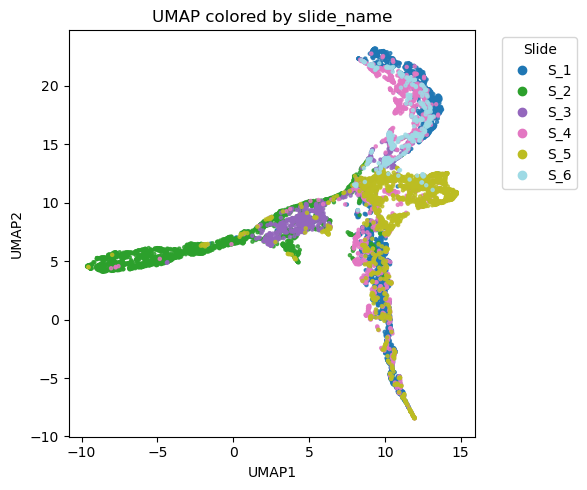

Average abs(Spearman rho) across all features: 0.254


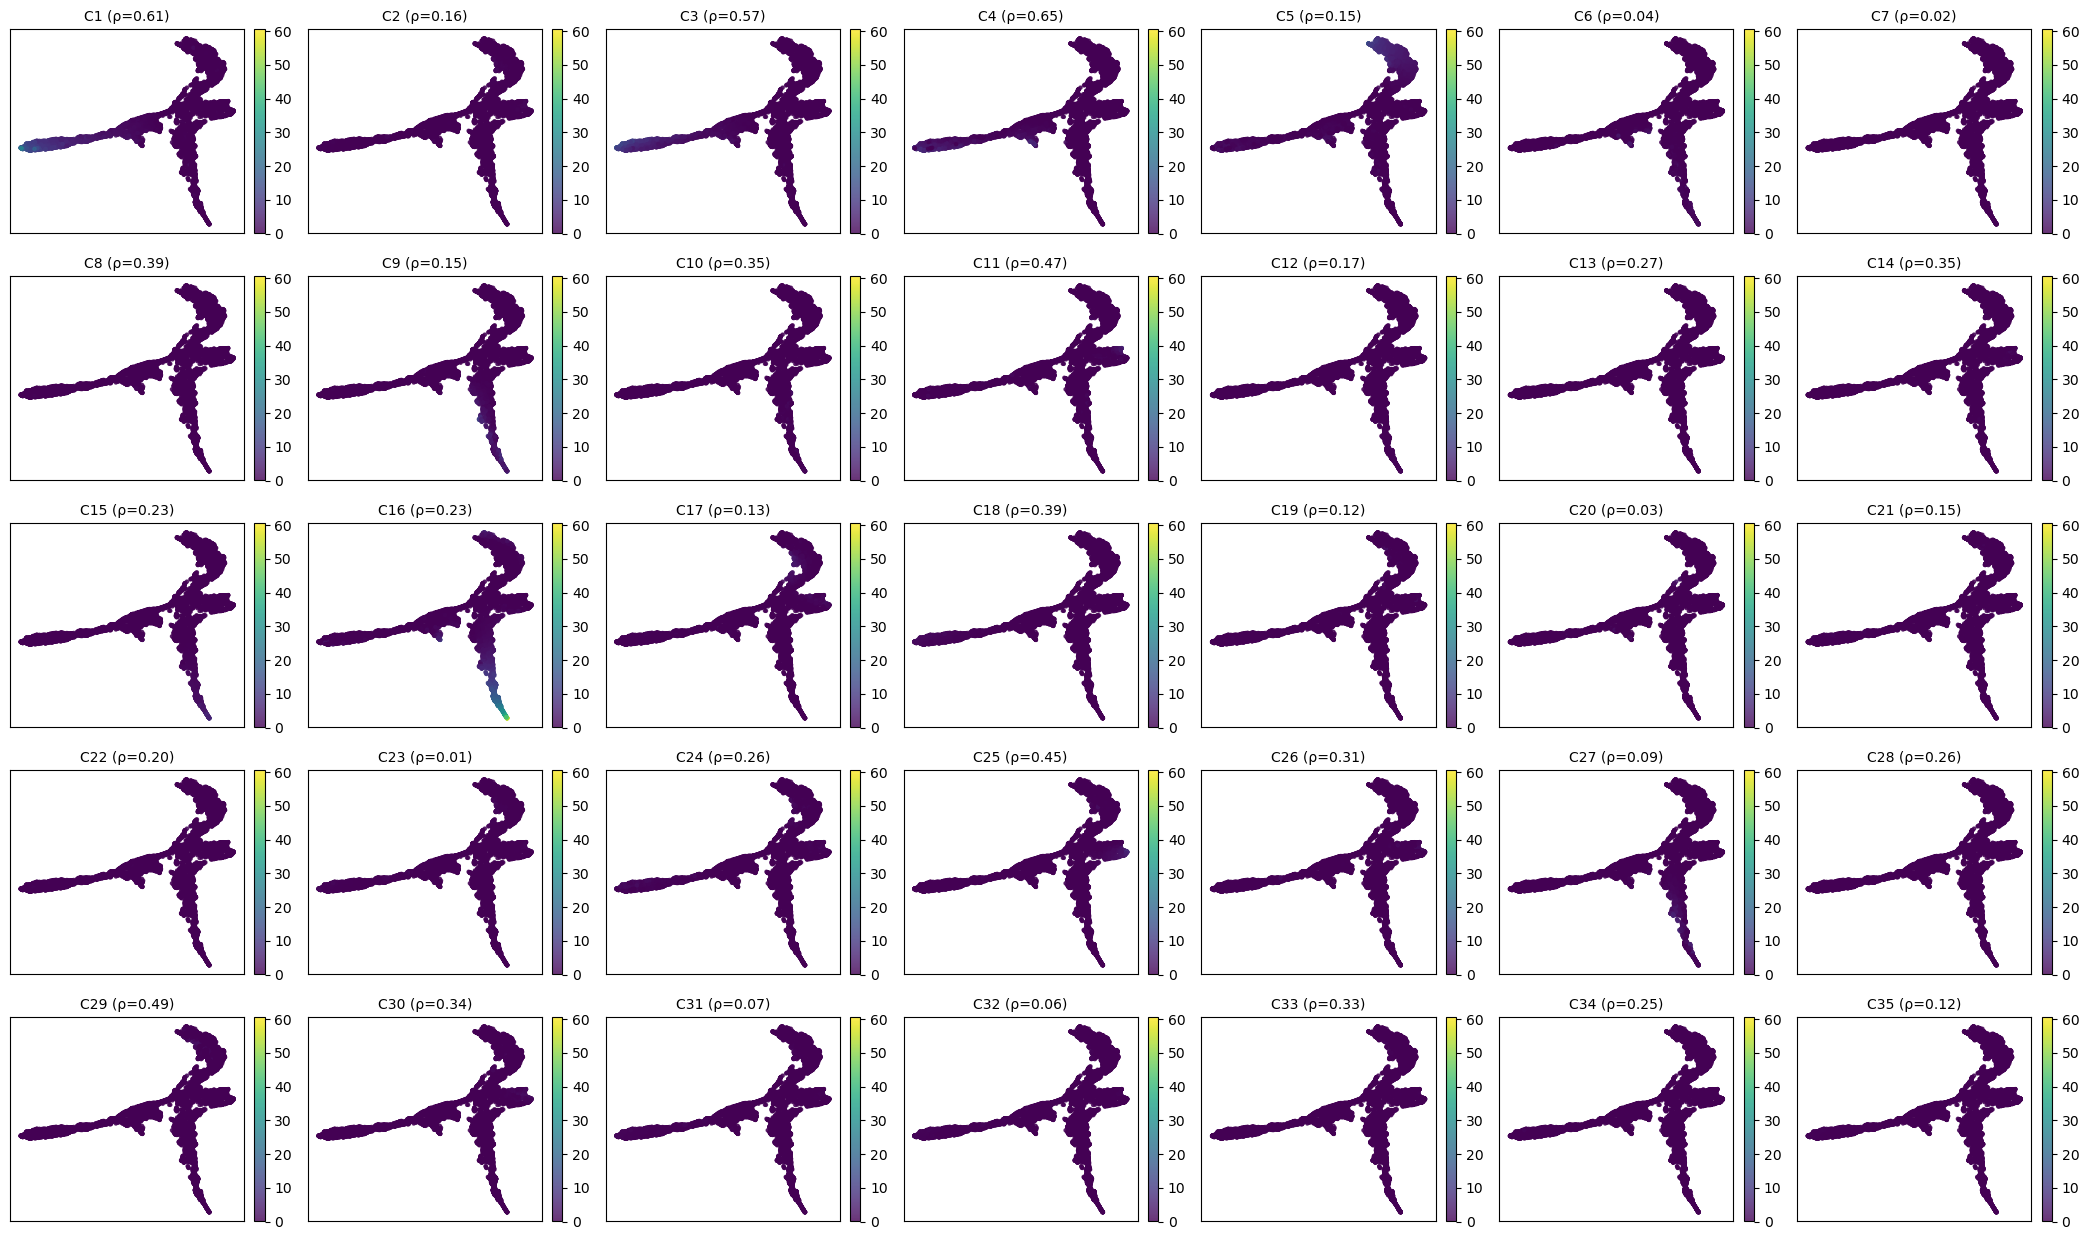

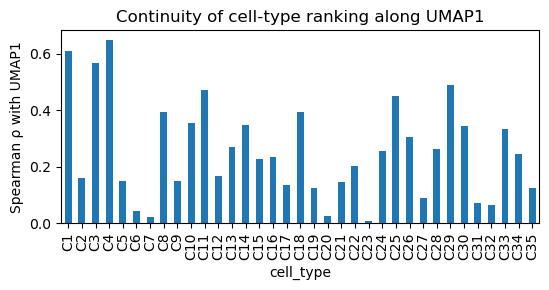

In [8]:

from scripts.replace_validation import plot_all_rank_umaps

# 1) 准备数据
rank_cols = [col for col in all_train_spots_df.columns if col.startswith("C")]
plot_all_rank_umaps(all_train_spots_df, rank_cols = rank_cols)


/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/spatialhackathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


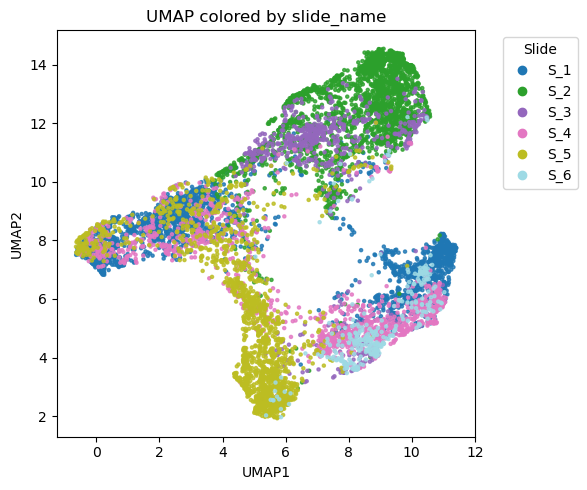

Average abs(Spearman rho) across all features: 0.368


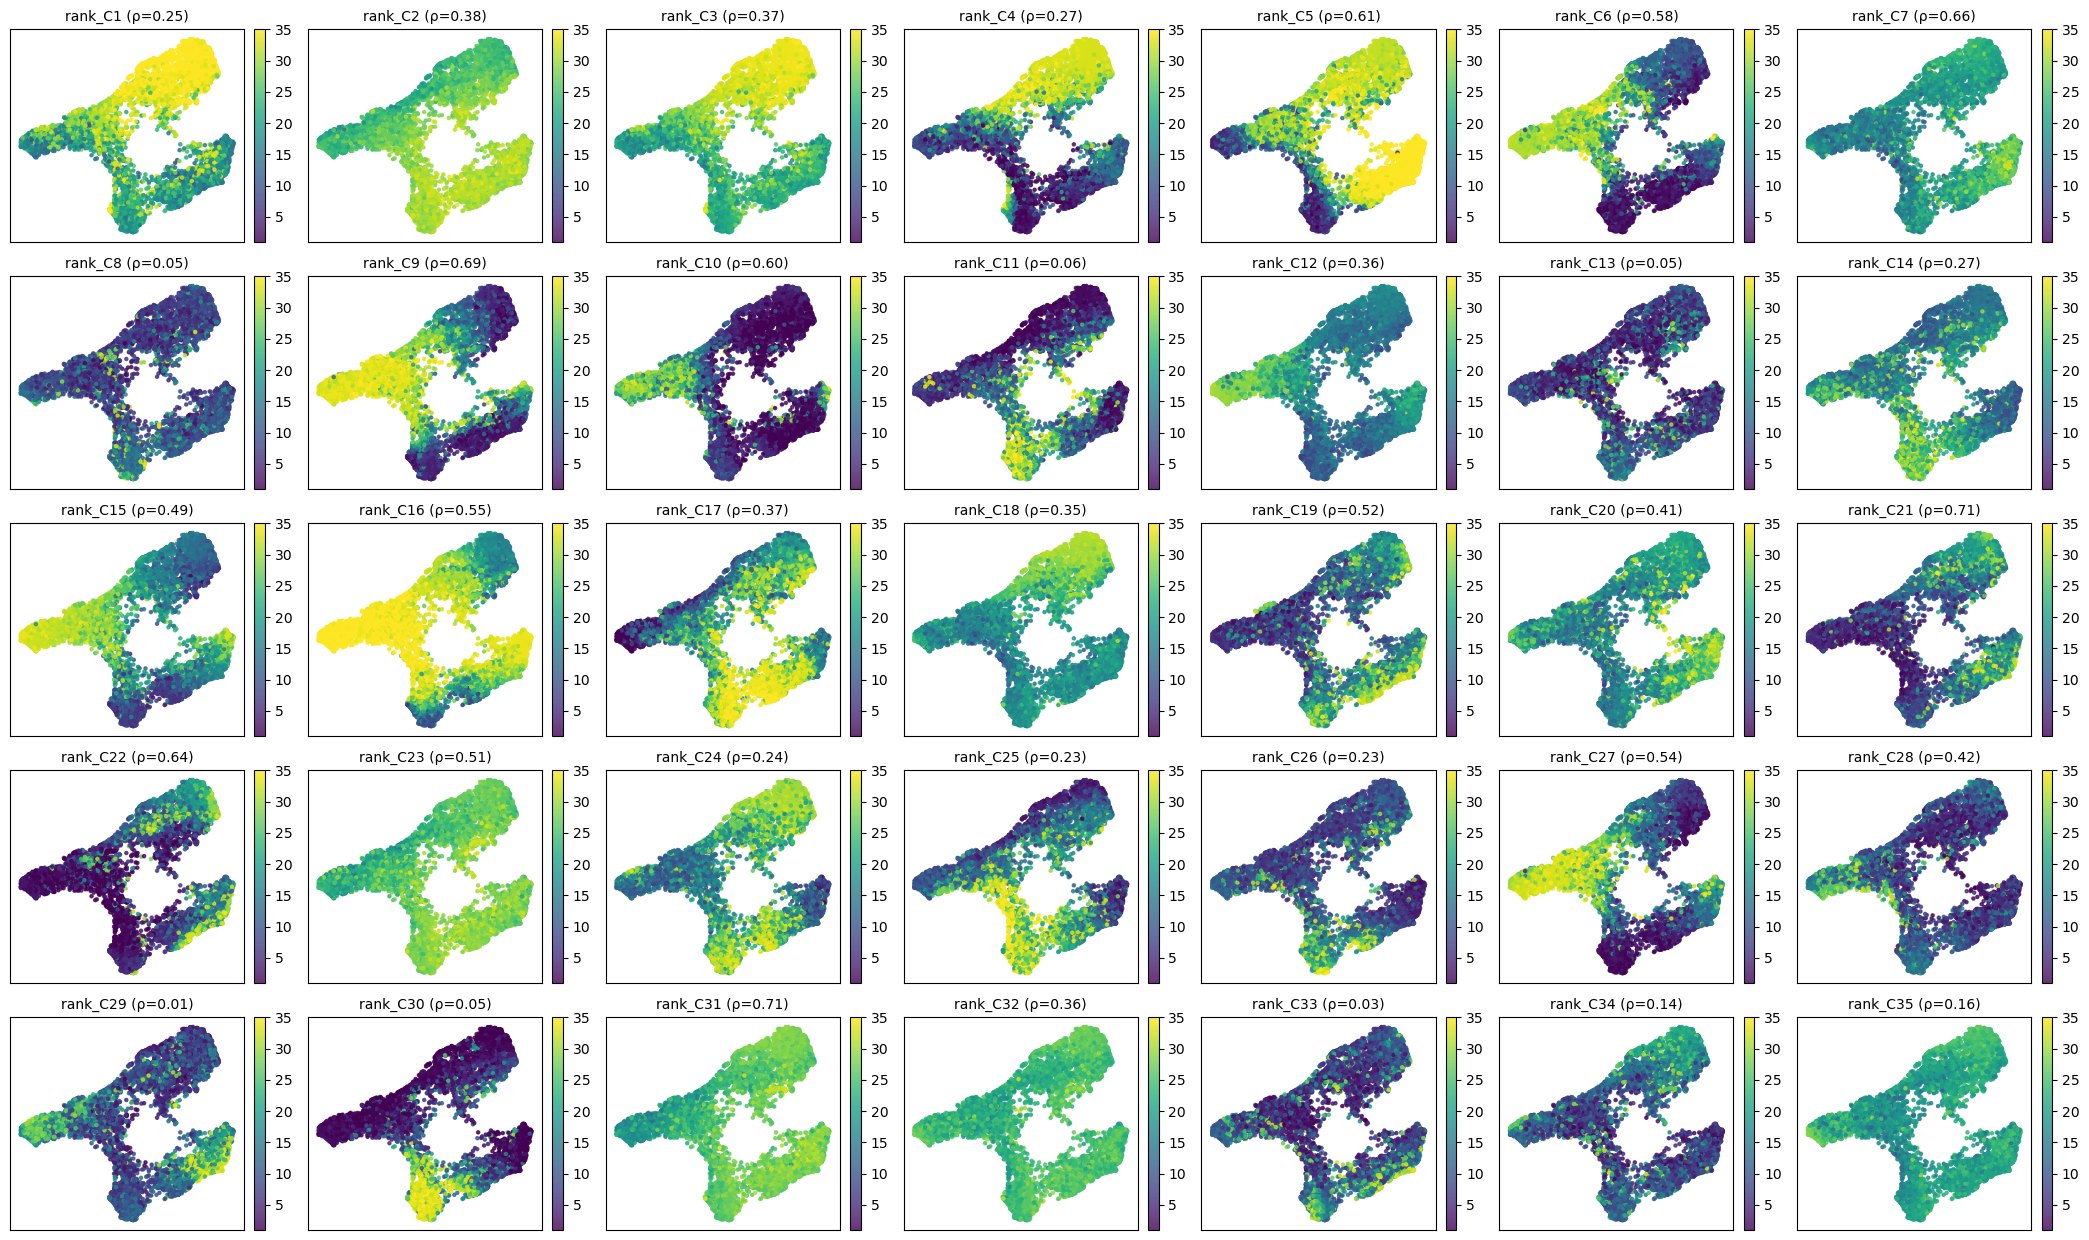

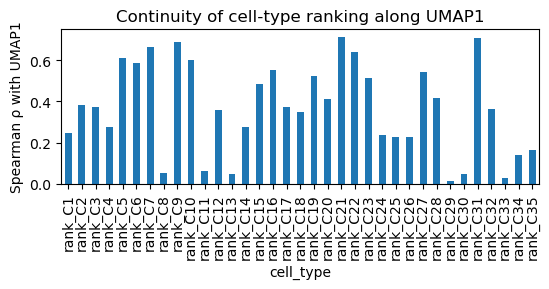

In [7]:
from scripts.replace_validation import plot_all_rank_umaps


# 用法：一行代码画出全部 35 张
plot_all_rank_umaps(ranked_df)


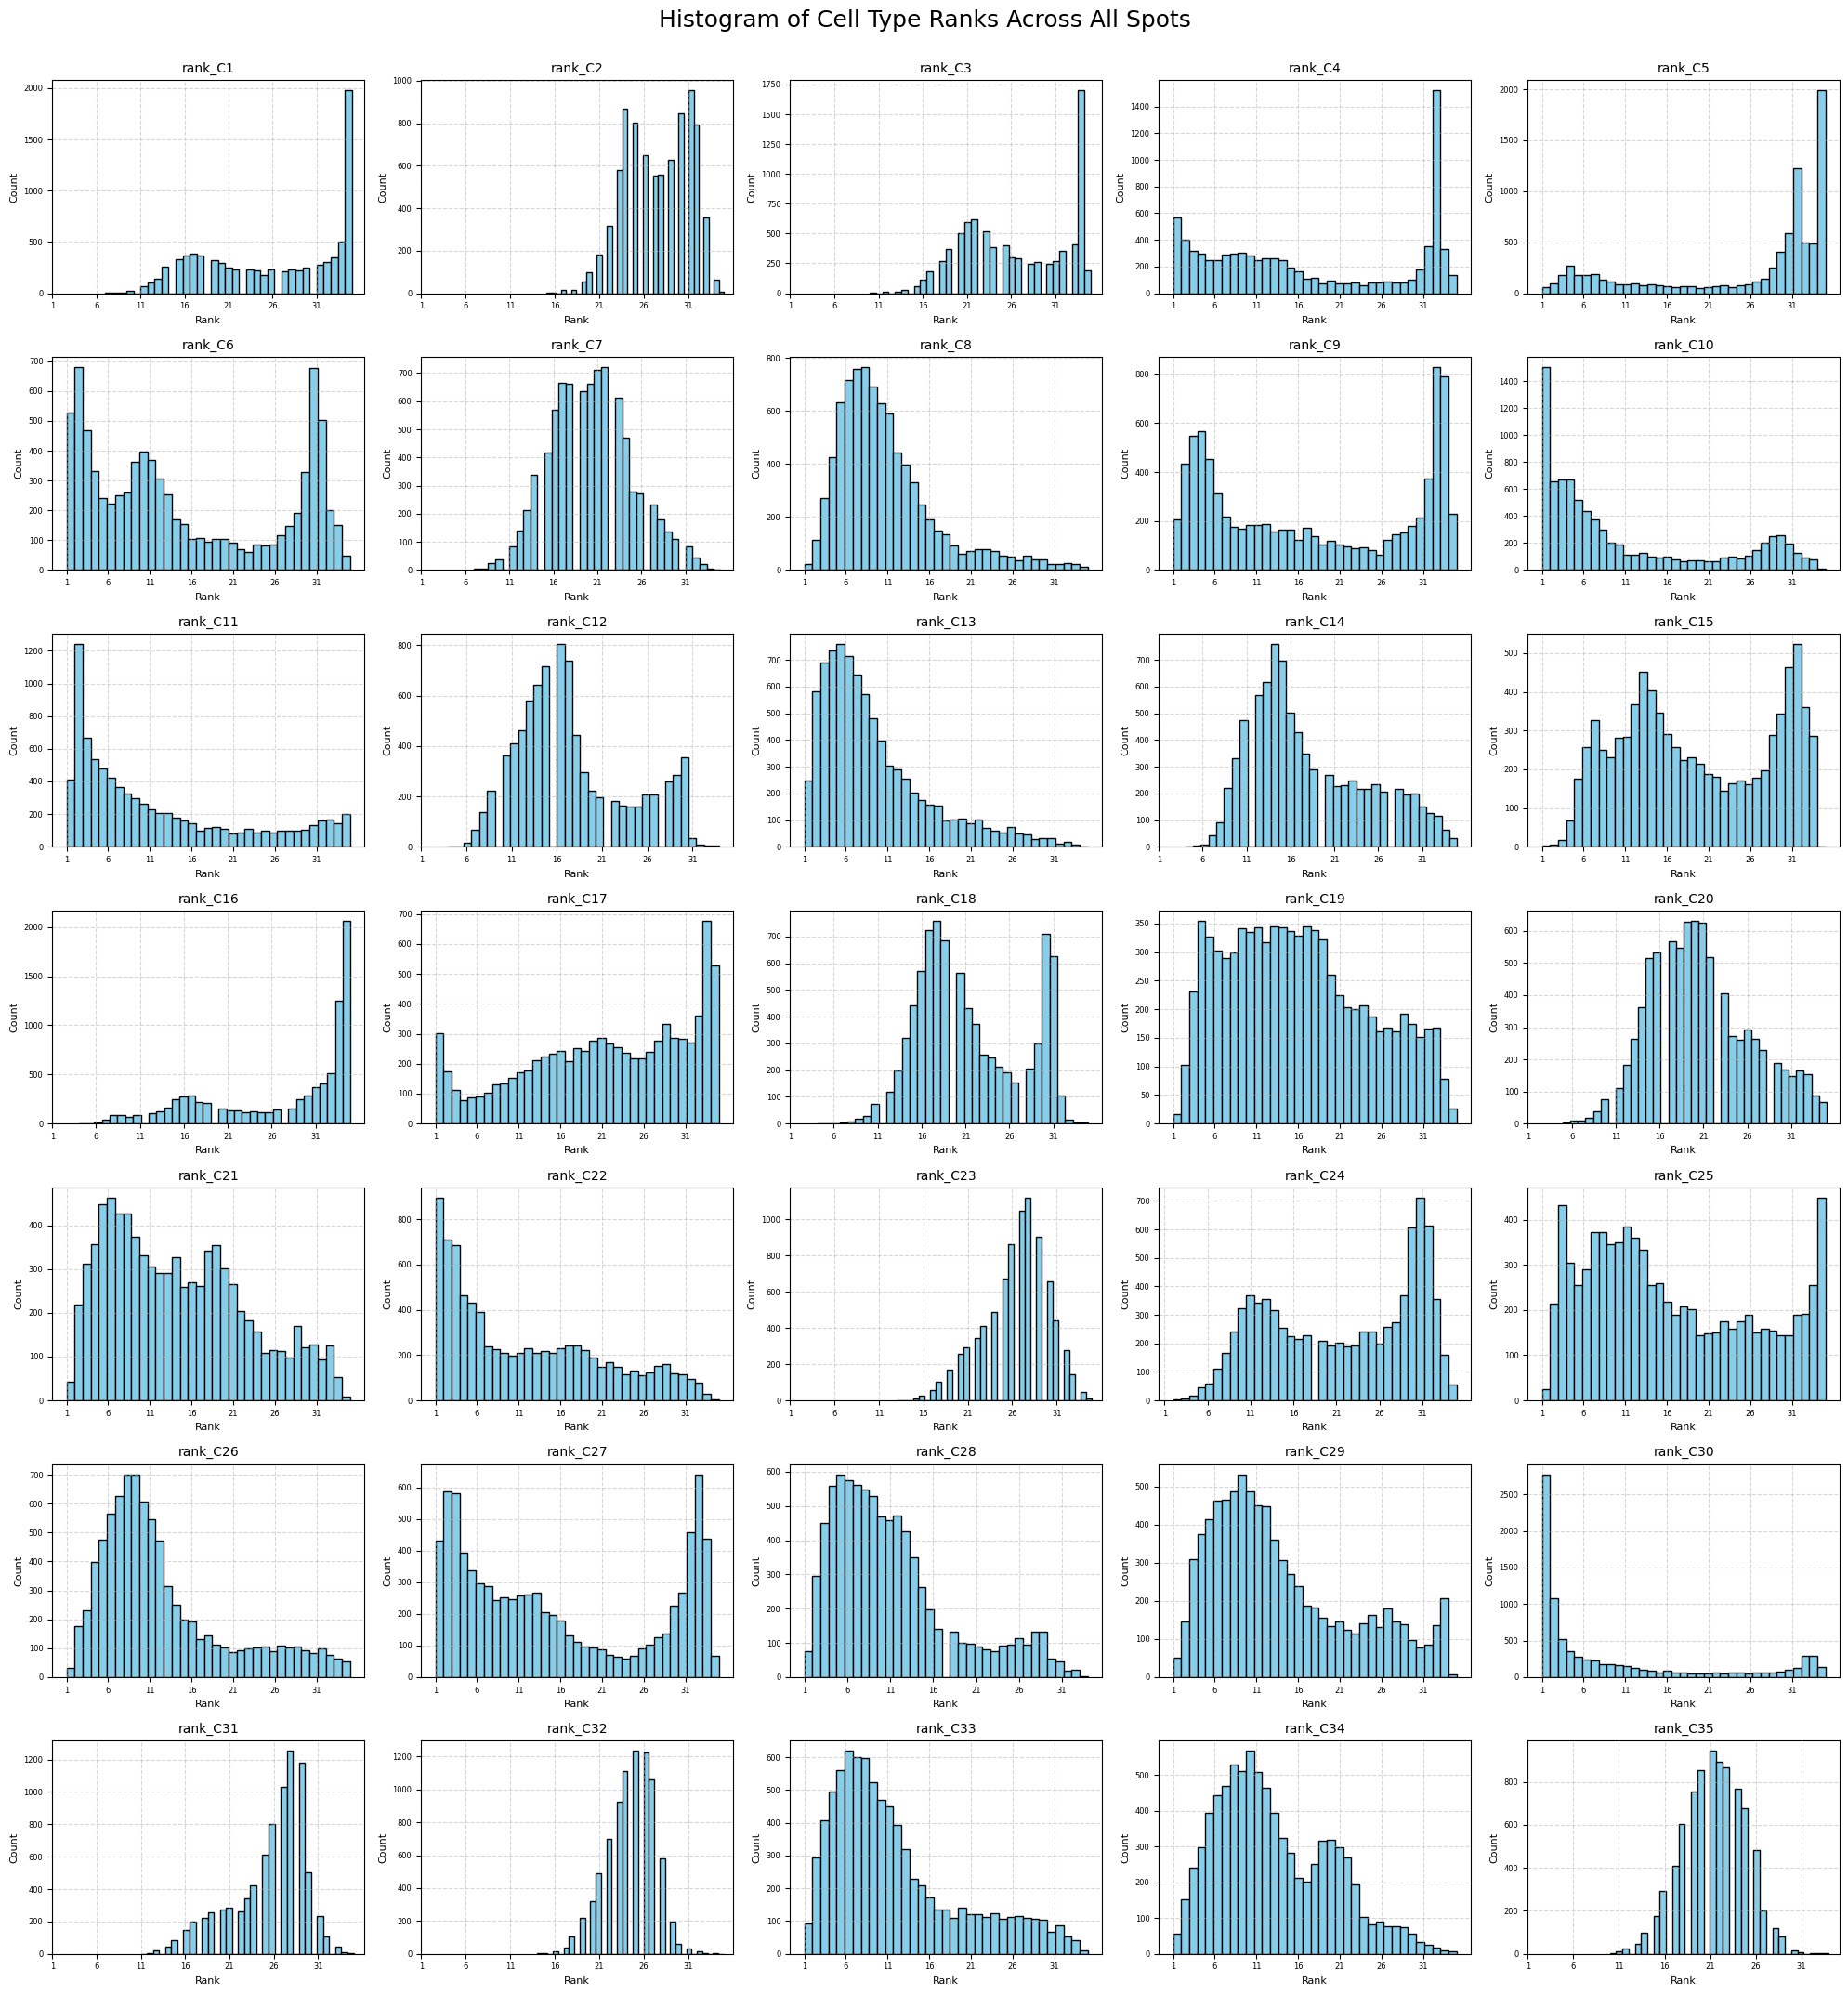

In [11]:
import matplotlib.pyplot as plt
import math

# 所有排名欄位
rank_cols = [col for col in ranked_df.columns if col.startswith("rank_")]
n_plots = len(rank_cols)

# 設定 subplot 的行與列數（例如每列 5 張圖）
n_cols = 5
n_rows = math.ceil(n_plots / n_cols)

# 建立畫布
plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(rank_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(ranked_df[col], bins=35, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=10)
    plt.xlabel("Rank", fontsize=8)
    plt.ylabel("Count", fontsize=8)
    plt.xticks(range(1, 36, 5), fontsize=6)
    plt.yticks(fontsize=6)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("Histogram of Cell Type Ranks Across All Spots", fontsize=18, y=1.02)
plt.show()


## Save data

In [12]:
import h5py
import numpy as np
import pandas as pd

save_folder = "dataset/"
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
output_file = os.path.join(save_folder, "try_replace_with_rank.h5")

with h5py.File(output_file, "w") as f_out:
    # 建立 group "spots/Train"
    slides_group = f_out.create_group("spots/Train")
    
    # 根據 slide_name 分組，並將每個 slide 的資料存入 dataset
    for slide_name, group_df in ranked_df.groupby("slide_name"):
        # 選擇需要儲存的欄位：x, y 以及所有 zscore_log2_filtered_{cell} 欄位

        cols_to_save = ["x", "y"] + [f"rank_{col}" for col in cell_type_cols]
        # 取出對應的資料
        df_to_save = group_df[cols_to_save].copy()
        
        # 將 DataFrame 轉成 numpy 結構化陣列（不保存 index）
        rec_array = df_to_save.to_records(index=False)
        
        # 存入 group，鍵為 slide_name
        slides_group.create_dataset(slide_name, data=rec_array)
        print(f"Slide {slide_name} 資料已存入 HDF5。")
    print(f"Saved{cols_to_save}")

        
print(f"所有資料與參數已存入 HDF5 檔案：{output_file}")

Slide S_1 資料已存入 HDF5。
Slide S_2 資料已存入 HDF5。
Slide S_3 資料已存入 HDF5。
Slide S_4 資料已存入 HDF5。
Slide S_5 資料已存入 HDF5。
Slide S_6 資料已存入 HDF5。
Saved['x', 'y', 'rank_C1', 'rank_C2', 'rank_C3', 'rank_C4', 'rank_C5', 'rank_C6', 'rank_C7', 'rank_C8', 'rank_C9', 'rank_C10', 'rank_C11', 'rank_C12', 'rank_C13', 'rank_C14', 'rank_C15', 'rank_C16', 'rank_C17', 'rank_C18', 'rank_C19', 'rank_C20', 'rank_C21', 'rank_C22', 'rank_C23', 'rank_C24', 'rank_C25', 'rank_C26', 'rank_C27', 'rank_C28', 'rank_C29', 'rank_C30', 'rank_C31', 'rank_C32', 'rank_C33', 'rank_C34', 'rank_C35']
所有資料與參數已存入 HDF5 檔案：dataset/try_replace_with_rank.h5
